<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/Ameise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

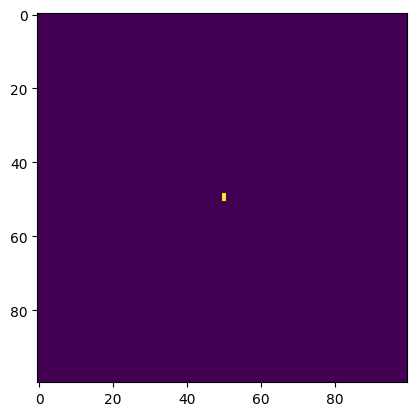

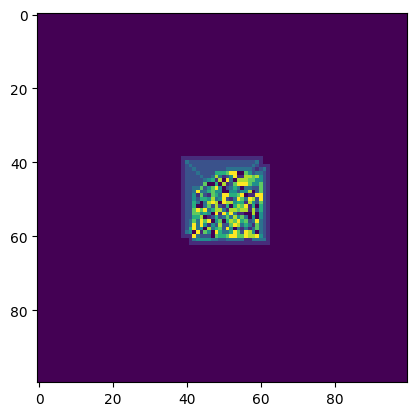

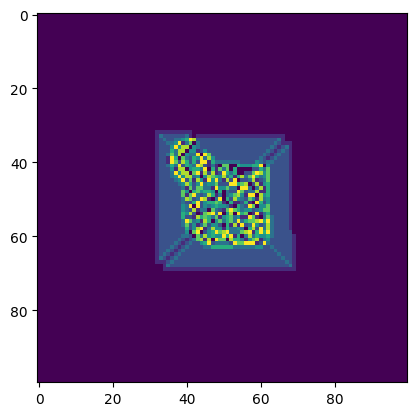

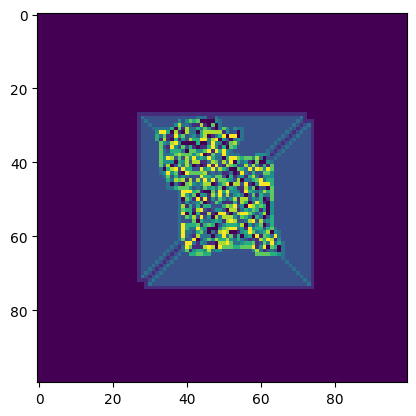

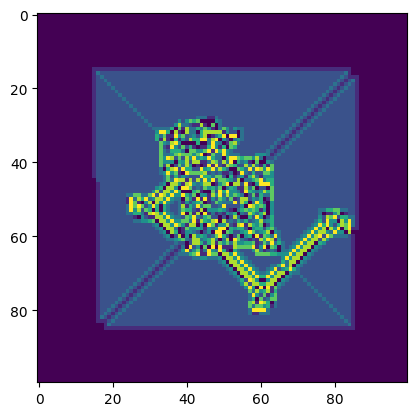

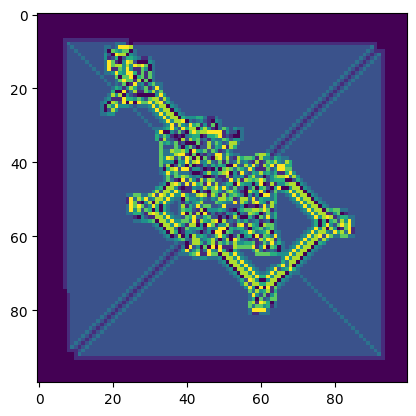

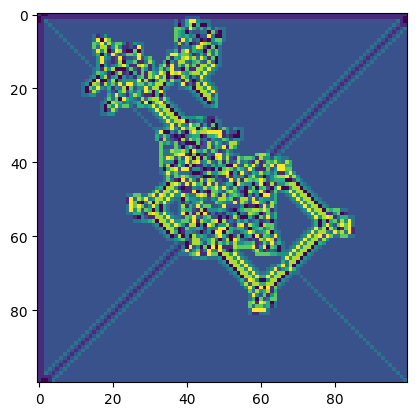

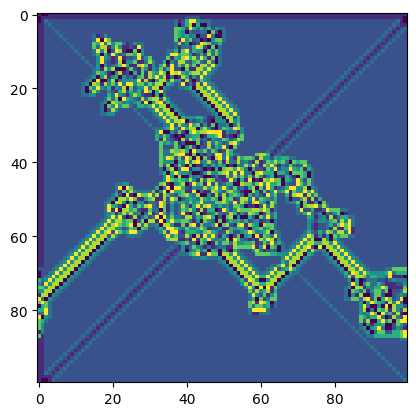

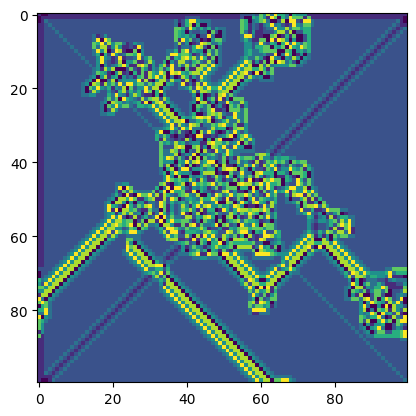

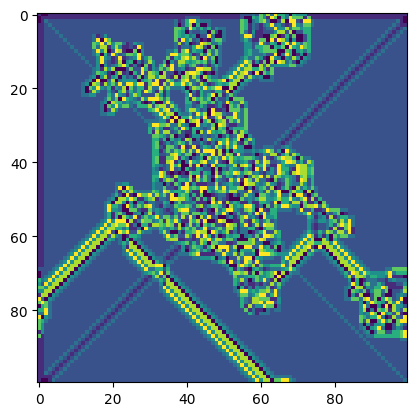

29612.0


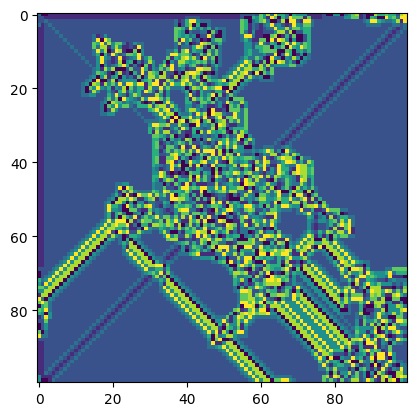

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Ameise():
    def __init__(self, pos=[10,10]):
        self.pos = pos
        self.richtung = 0 # 0: oben, 1: links, 2: unten, 3: rechts
        self.updateregel = "LRRRRRLLR"

    def gehe_vorwaerts(self, spielfeld):
        # 1. Bewege dich vorwärts
        if self.richtung==0: # oben
            self.pos[0] -= 1
        elif self.richtung==2: # unten
            self.pos[0] += 1
        elif self.richtung==1: # links
            self.pos[1] -= 1
        elif self.richtung==3: # rechts
            self.pos[1] += 1
        # 1.a) Verlasse nicht das Spielfeld
        self.pos[0] %= len(spielfeld)
        self.pos[1] %= len(spielfeld[0])

        # 2. Drehe dich nach links oder rechts
        farbwert = int(spielfeld[self.pos[0], self.pos[1]])
        if self.updateregel[farbwert].upper()=="L": # "Wenn das Feld unter uns gelb ist, drehe nach links"
            self.drehe_links()
        elif self.updateregel[farbwert].upper()=="R":
            self.drehe_rechts()
        elif self.updateregel[farbwert].upper()=="U":
            self.drehe_rechts()
            self.drehe_rechts()

        # 3. Wandle Farbe des Spielfelds um
        spielfeld = self.set_feld(spielfeld)
        return spielfeld

    def drehe_links(self):
        self.richtung +=1
        self.richtung %= 4

    def drehe_rechts(self):
        self.richtung -= 1
        self.richtung %= 4

    def set_feld(self, spielfeld):
        spielfeld[self.pos[0], self.pos[1]] += 1
        spielfeld[self.pos[0], self.pos[1]] %= len(self.updateregel)
        return spielfeld

N = 100
spielfeld = np.zeros([N,N])
spielfeld[N//2, N//2] = 1

olli = Ameise(pos=[N//2, N//2])

text = """
"""
for i in range(100000):
    spielfeld = olli.gehe_vorwaerts(spielfeld)
    if i%10000==0:
        plt.figure()
        plt.imshow(spielfeld)
        #plt.imsave("test.png", spielfeld)
        plt.show()

print(np.sum(spielfeld))
plt.figure()
plt.imshow(spielfeld)
plt.imsave("test.png", spielfeld)
plt.show()

In [39]:
plt.imsave("test.png", spielfeld, cmap="terrain")

In [ ]:
print(ord("?"))

63
